<a href="https://colab.research.google.com/github/sandhiya0147/Data_Science/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**LOAD DATASET:**

In [2]:
df = pd.read_csv('task1.csv')

**BASIC INSPECTION:**

In [8]:
print("1.Data head:\n", df.head())
print("\n2.Data Shape:", df.shape)
print("\n3.Data Types:\n", df.dtypes)
print("\n4.Missing Values:\n", df.isnull().sum())
print("\n5.Descriptive Stats:\n", df.describe())

1.Data head:
    High_school_GPA  No_extracurr_acti  Parental_income  No_hrs_studiedperweek  \
0              3.8                  3           705500                     15   
1              3.2                  5           498000                     10   
2              4.0                  2           996000                     20   
3              2.9                  4           373500                      8   
4              3.5                  1           813400                     12   

   Performance_intest  Distance_fromclg IA_athome Final_yearres  
0                  88                 5       yes          pass  
1                  72                12       yes          pass  
2                  95                 3       yes          pass  
3                  65                15        no          fail  
4                  82                 8       yes          pass  

2.Data Shape: (20, 8)

3.Data Types:
 High_school_GPA          float64
No_extracurr_acti          int6

**VISUAL ANALYSIS:**

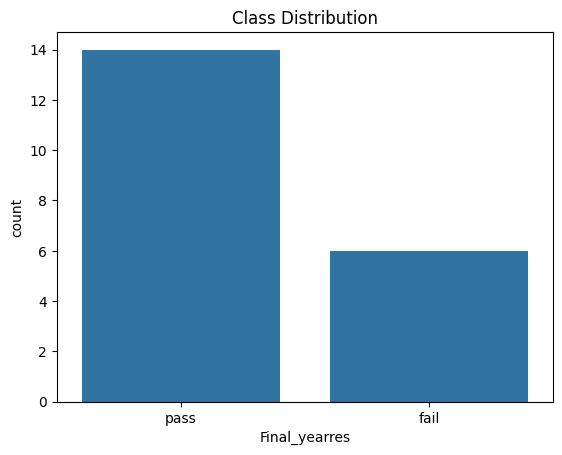

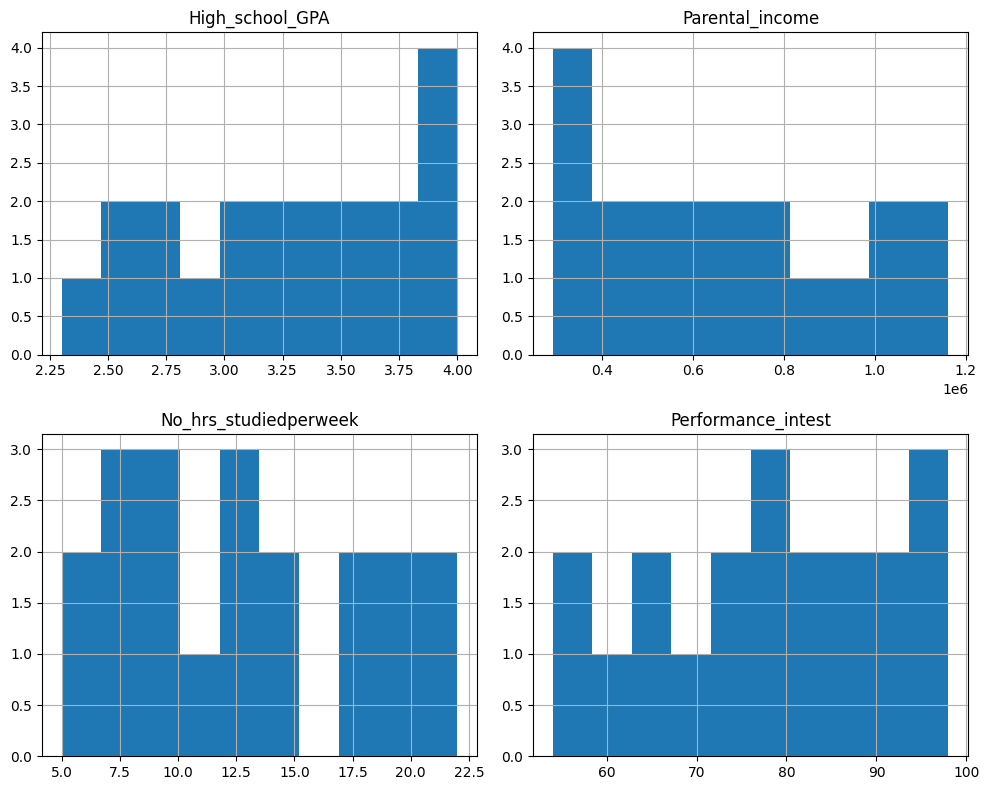

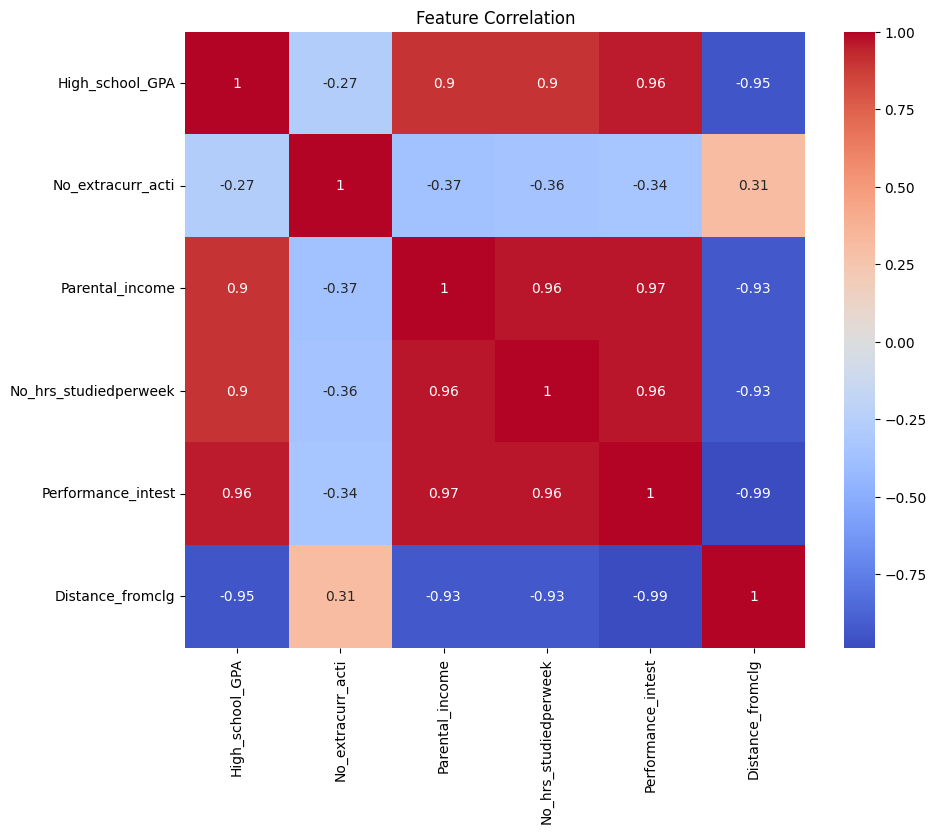

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='Final_yearres', data=df)
plt.title('Class Distribution')
plt.show()

# Numerical features distribution
num_cols = ['High_school_GPA', 'Parental_income', 'No_hrs_studiedperweek', 'Performance_intest']
df[num_cols].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

**DATA PREPROCESSING:**

1.Feature Engineering:

In [10]:
# Convert categorical to numerical
df['IA_athome'] = df['IA_athome'].map({'yes':1, 'no':0})
df['Final_yearres'] = df['Final_yearres'].map({'pass':1, 'fail':0})

print("\nUnique values in IA_athome:", df['IA_athome'].unique())
print("Unique values in Final_yearres:", df['Final_yearres'].unique())


Unique values in IA_athome: [1 0]
Unique values in Final_yearres: [1 0]


2.Train-Test Split:

In [11]:
# Separate features and target
X = df.drop('Final_yearres', axis=1)
y = df['Final_yearres']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (16, 7)
Test set shape: (4, 7)


3.Feature Scaling:

In [12]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['High_school_GPA', 'Parental_income', 'No_hrs_studiedperweek', 'Performance_intest', 'Distance_fromclg']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nScaled Training Data Sample:\n", X_train.head())


Scaled Training Data Sample:
     High_school_GPA  No_extracurr_acti  Parental_income  \
1         -0.173435                  5        -0.662276   
18        -1.957341                  3        -1.384014   
7          1.214047                  2         0.978036   
16         1.114941                  2         1.470130   
4          0.421200                  1         0.584361   

    No_hrs_studiedperweek  Performance_intest  Distance_fromclg  IA_athome  
1               -0.543915           -0.481474          0.399004          1  
18              -1.532851           -1.882126          2.124429          0  
7                1.038383            0.996992         -0.981335          1  
16               1.236170            1.152620         -0.981335          1  
4               -0.148340            0.296666         -0.291165          1  


**MODEL BUILDING & EVALUATION:**

Logistic Regression:

In [13]:
# Initialize and train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance:\n", importance)


Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Feature Importance:
                  Feature  Coefficient
6              IA_athome     0.785697
0        High_school_GPA     0.675692
5       Distance_fromclg    -0.554128
4     Performance_intest     0.525136
2        Parental_income     0.511809
3  No_hrs_studiedperweek     0.414487
1      No_extracurr_acti    -0.227378
